In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from skimage.io import imsave

from os import listdir
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
with open('../data/mfcc/mfcc_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [17]:
df

,mfcc,lang
0,"[[-218.45549, -218.13553, -225.98561, -238.920...",en
1,"[[-160.82382, -184.89398, -213.44357, -215.361...",en
2,"[[-363.65494, -332.7844, -322.0551, -325.19055...",en
3,"[[-299.08017, -295.36636, -324.92734, -368.853...",en
4,"[[-225.17198, -250.00174, -283.49326, -277.666...",en
...,...,...
3443,"[[-521.1058, -513.96063, -512.47095, -513.9727...",zh
3444,"[[-444.64468, -367.61206, -310.60666, -317.932...",zh
3445,"[[-252.55998, -282.72787, -329.2826, -325.5801...",zh
3446,"[[-312.48975, -355.90347, -434.3935, -386.7475...",zh


In [23]:
df.iloc[0, 0].shape

(20, 157)

In [25]:
X = df['mfcc']

In [28]:
X = np.stack(X)

In [38]:
X = X.reshape(9509, 20, 157, 1)

In [30]:
y = np.where(df['lang'] == 'en', 0, 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
X_train.shape

(7131, 20, 157, 1)

In [41]:
X_test.shape

(2378, 20, 157, 1)

In [42]:
y_train.shape

(7131,)

In [43]:
y_test.shape

(2378,)

In [52]:
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (20, 157, 1)))
model.add(Conv2D(filters = 10, kernel_size = 10, activation = 'relu', input_shape = (20, 157, 1)))
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [49]:
earlystop = EarlyStopping(patience=5)

In [50]:
# model = Sequential()
# model.add(BatchNormalization())
# model.add(Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (20, 157, 1)))
# model.add(Flatten())
# model.add(Dropout(.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test), 
    callbacks=[earlystop], 
    epochs=25
)

Epoch 1/25
223/223 [==============================] - 10s 36ms/step - loss: 0.5754 - acc: 0.6987 - val_loss: 0.4040 - val_acc: 0.8082
Epoch 2/25
223/223 [==============================] - 8s 34ms/step - loss: 0.4006 - acc: 0.8209 - val_loss: 0.3873 - val_acc: 0.8175
Epoch 3/25
223/223 [==============================] - 8s 35ms/step - loss: 0.3094 - acc: 0.8666 - val_loss: 0.3396 - val_acc: 0.8650
Epoch 4/25
223/223 [==============================] - 8s 35ms/step - loss: 0.2246 - acc: 0.9062 - val_loss: 0.2708 - val_acc: 0.8923
Epoch 5/25
223/223 [==============================] - 8s 36ms/step - loss: 0.1757 - acc: 0.9277 - val_loss: 0.2944 - val_acc: 0.8919
Epoch 6/25
223/223 [==============================] - 9s 39ms/step - loss: 0.1312 - acc: 0.9479 - val_loss: 0.2925 - val_acc: 0.8940
Epoch 7/25
223/223 [==============================] - 8s 36ms/step - loss: 0.1546 - acc: 0.9336 - val_loss: 0.3239 - val_acc: 0.8978
Epoch 8/25
223/223 [==============================] - 8s 36ms/step -

In [53]:
# model = Sequential()
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dropout(.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(.2))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test), 
    callbacks=[earlystop], 
    epochs=25
)

Epoch 1/25
223/223 [==============================] - 2s 7ms/step - loss: 0.6368 - acc: 0.6586 - val_loss: 0.4741 - val_acc: 0.7771
Epoch 2/25
223/223 [==============================] - 1s 6ms/step - loss: 0.5115 - acc: 0.7453 - val_loss: 0.4330 - val_acc: 0.7868
Epoch 3/25
223/223 [==============================] - 1s 6ms/step - loss: 0.4589 - acc: 0.7771 - val_loss: 0.4139 - val_acc: 0.8066
Epoch 4/25
223/223 [==============================] - 1s 6ms/step - loss: 0.4256 - acc: 0.7862 - val_loss: 0.4077 - val_acc: 0.7906
Epoch 5/25
223/223 [==============================] - 1s 6ms/step - loss: 0.4080 - acc: 0.7902 - val_loss: 0.3778 - val_acc: 0.8171
Epoch 6/25
223/223 [==============================] - 1s 6ms/step - loss: 0.3806 - acc: 0.8071 - val_loss: 0.3880 - val_acc: 0.8146
Epoch 7/25
223/223 [==============================] - 1s 6ms/step - loss: 0.3699 - acc: 0.8127 - val_loss: 0.3655 - val_acc: 0.8217
Epoch 8/25
223/223 [==============================] - 2s 7ms/step - loss: 0.

In [55]:
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (20, 157, 1)))
model.add(Conv2D(filters = 10, kernel_size = 10, activation = 'relu', input_shape = (20, 157, 1)))
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test), 
    callbacks=[earlystop], 
    epochs=25
)

Epoch 1/25
223/223 [==============================] - 37s 157ms/step - loss: 0.5778 - acc: 0.6921 - val_loss: 0.3523 - val_acc: 0.8520
Epoch 2/25
223/223 [==============================] - 34s 151ms/step - loss: 0.3334 - acc: 0.8591 - val_loss: 0.3267 - val_acc: 0.8629
Epoch 3/25
223/223 [==============================] - 30s 135ms/step - loss: 0.2550 - acc: 0.8972 - val_loss: 0.2125 - val_acc: 0.9218
Epoch 4/25
223/223 [==============================] - 29s 130ms/step - loss: 0.1724 - acc: 0.9344 - val_loss: 0.2521 - val_acc: 0.8915
Epoch 5/25
223/223 [==============================] - 29s 128ms/step - loss: 0.1366 - acc: 0.9512 - val_loss: 0.1965 - val_acc: 0.9298
Epoch 6/25
223/223 [==============================] - 29s 129ms/step - loss: 0.0996 - acc: 0.9622 - val_loss: 0.1902 - val_acc: 0.9348
Epoch 7/25
223/223 [==============================] - 29s 131ms/step - loss: 0.0790 - acc: 0.9722 - val_loss: 0.2441 - val_acc: 0.9260
Epoch 8/25
223/223 [==============================] - 3

In [58]:
# Epoch 11/25
# 223/223 [==============================] - 26s 118ms/step - loss: 0.0419 - acc: 0.9846 - val_loss: 0.2548 - val_acc: 0.9272
model.save('../models/cnn02242021.h5', save_format='h5')

Text(0.5, 1.0, 'Results')

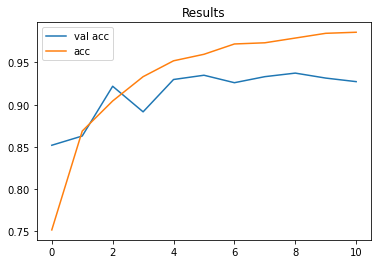

In [56]:
# plot
plt.plot(history.history['val_acc'], label = 'val acc')
plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.title('Results')